# Convert Yolo V5 TXT Annotations to VOC XML
Use this notebook to try out importing, analyzing, and exporting datasets of image annotations. 

In [1]:
!pip install -i https://test.pypi.org/simple/ pylabel==0.1.1

In [2]:
from pylabel import importer

## Import Yolo annotations 
First we will import annotations stored in Yolo v5 format. 

In [3]:
path_to_annotations = "/Users/alex/Google Drive/pylabel/datasets/wildlife/yolo_splits/val/labels/"

#Identify the path to get from the annotations to the images 
path_to_images = "../images/"

#Import the dataset into the pylable schema 
yoloclasses =["bear","cottontail","coyote","deer","elk","foxgray","foxred","opossum","racoon","snowshoehare","turkey"]
dataset = importer.ImportYoloV5(path=path_to_annotations, path_to_images=path_to_images, cat_names=yoloclasses,
    img_ext="jpeg", name="wildlife", img_height=329, img_width=329)

dataset.df.head(5)
#dataset.df.loc[:, dataset.df.columns.str.startswith('ann')]




,id,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,...,ann_area,ann_segmentation,ann_iscrowd,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split
0,0,../images/,2011341_2.jpeg,NaN,0,329,329,NaN,NaN,101.999870,...,10368.023154,NaN,NaN,NaN,NaN,NaN,3,deer,NaN,NaN
1,1,../images/,7985836_1.jpeg,NaN,1,329,329,NaN,NaN,22.999897,...,5858.988229,NaN,NaN,NaN,NaN,NaN,5,foxgray,NaN,NaN
2,2,../images/,3966713_1.jpeg,NaN,2,329,329,NaN,NaN,145.554864,...,384.333099,NaN,NaN,NaN,NaN,NaN,1,cottontail,NaN,NaN
3,3,../images/,2979383_1.jpeg,NaN,3,329,329,NaN,NaN,112.260228,...,248.934647,NaN,NaN,NaN,NaN,NaN,9,snowshoehare,NaN,NaN
4,4,../images/,2020781_2.jpeg,NaN,4,329,329,NaN,NaN,147.474908,...,3541.802023,NaN,NaN,NaN,NaN,NaN,6,foxred,NaN,NaN


## Analyze annotations
Pylabel can calculate basic summary statisticts about the dataset such as the number of files and the classes. 
The dataset is stored as a pandas frame so the developer can do additional exploratory analysis on the dataset. 

In [4]:
print(f"Number of images: {dataset.analyze.num_images}")
print(f"Number of classes: {dataset.analyze.num_classes}")
print(f"Classes:{dataset.analyze.classes}")
print(f"Class counts:\n{dataset.analyze.class_counts}")

Number of images: 1918
Number of classes: 10
Classes:['deer' 'foxgray' 'cottontail' 'snowshoehare' 'foxred' 'coyote' 'opossum'
 'racoon' 'elk' 'bear']
Class counts:
deer            577
elk             296
opossum         265
racoon          198
snowshoehare    185
cottontail      162
coyote          156
foxgray         145
foxred           79
bear             57
Name: cat_name, dtype: int64


## Visualize Annotations 
You can render the bounding boxes for your image to inspect them and confirm that they imported correctly.  

/Users/alex/Google Drive/pylabel/datasets/wildlife/yolo_splits/val/labels/../images/4979998_2.jpeg


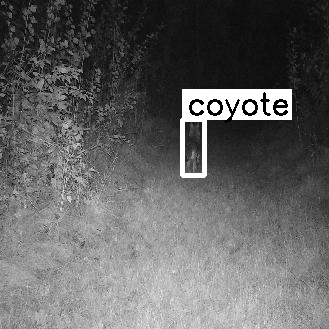

/Users/alex/Google Drive/pylabel/datasets/wildlife/yolo_splits/val/labels/../images/2020781_2.jpeg


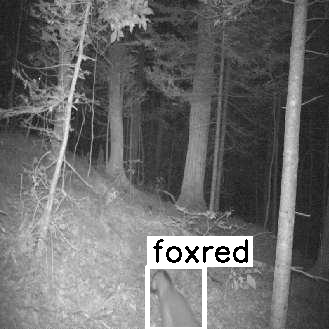

In [5]:
from IPython.display import Image, display
display(dataset.visualize.ShowBoundingBoxes(dataset, 100))
display(dataset.visualize.ShowBoundingBoxes(dataset, "2020781_2.jpeg"))

# Export to Coco XML
The PyLabel exporter will export all of the annotations in the dataframe to the desired target format.
All annotations will be stored in a single json file. 

In [6]:
from pathlib import Path
import os
output_path = str(Path(dataset.path_to_annotations, "../", "voc_annotations/"))
print(output_path)
Path(output_path).mkdir(exist_ok=True)
dataset.export.ExportToVoc(dataset, output_file_path_=output_path)


/Users/alex/Google Drive/pylabel/datasets/wildlife/yolo_splits/val/labels/../voc_annotations
2041874_0.jpeg
/Users/alex/Google Drive/pylabel/datasets/wildlife/yolo_splits/val/labels/../voc_annotations
/Users/alex/Google Drive/pylabel/datasets/wildlife/yolo_splits/val/labels/../voc_annotations/2041874_0_jpeg.xml
4980760_2.jpeg
/Users/alex/Google Drive/pylabel/datasets/wildlife/yolo_splits/val/labels/../voc_annotations
/Users/alex/Google Drive/pylabel/datasets/wildlife/yolo_splits/val/labels/../voc_annotations/4980760_2_jpeg.xml
4935735_2.jpeg
/Users/alex/Google Drive/pylabel/datasets/wildlife/yolo_splits/val/labels/../voc_annotations
/Users/alex/Google Drive/pylabel/datasets/wildlife/yolo_splits/val/labels/../voc_annotations/4935735_2_jpeg.xml
2011393_0.jpeg
/Users/alex/Google Drive/pylabel/datasets/wildlife/yolo_splits/val/labels/../voc_annotations
/Users/alex/Google Drive/pylabel/datasets/wildlife/yolo_splits/val/labels/../voc_annotations/2011393_0_jpeg.xml
2020769_1.jpeg
/Users/alex/

()